In [5]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
#import pandas_profiling 
import seaborn as sns

from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import model_selection

In [6]:
%pylab inline
# для использования графиков

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'plt', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### импорт данных

In [2]:
train = pd.read_csv('real_train.csv')
feature = pd.read_csv('features.csv')
test = pd.read_csv('real_test.csv')
stores = pd.read_csv('stores.csv')

writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

In [3]:
train_bt = pd.merge(train,stores) #объединение
train = pd.merge(train_bt,feature)
#
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [4]:
train.shape # возвращает кол-во строк и колонок

(421570, 16)

In [7]:
#вычисление попарной корреляции
train_corr=pd.DataFrame(train.corr())
train_corr.to_excel(writer,'Train_Data Corr',index=True)
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238


## изучение данных

### построение тепловой карты на определение избыточных признаков

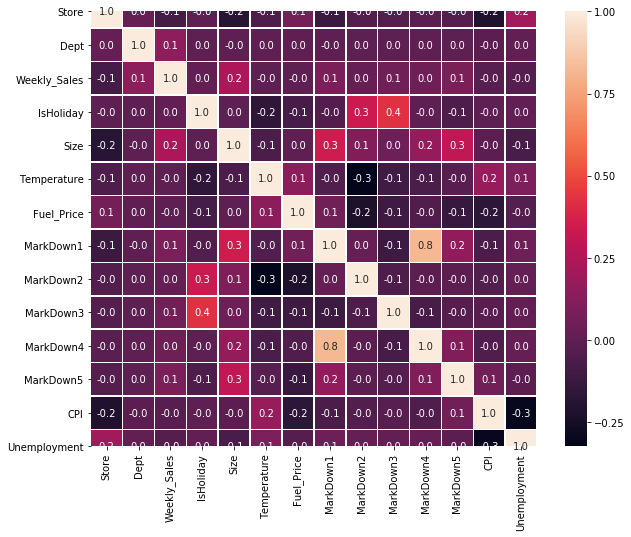

In [9]:
from IPython.core.pylabtools import figsize
figsize(10,8)
svm = sns.heatmap(train.corr(),annot = True, fmt ='.1f', linewidths=.5)
#sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
figure = svm.get_figure()
figure.savefig('svm_conf.png', dpi=400)

### гистограмма - величина целевой переменной в зависимости от типа магазина

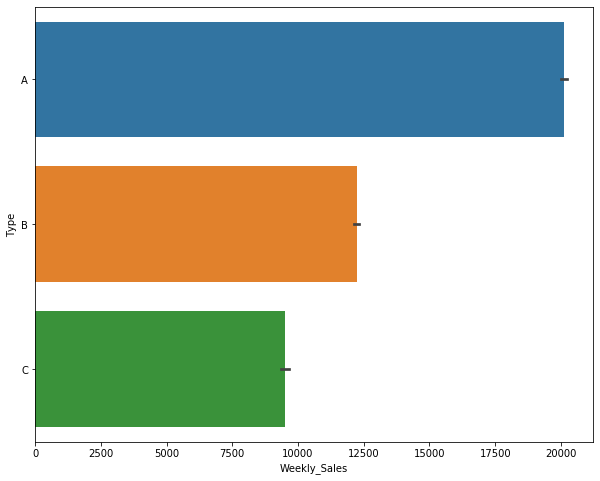

In [20]:

svm = sns.barplot(x=train["Weekly_Sales"],y=train["Type"])
figure = svm.get_figure()
figure.savefig('type.png', dpi=400)

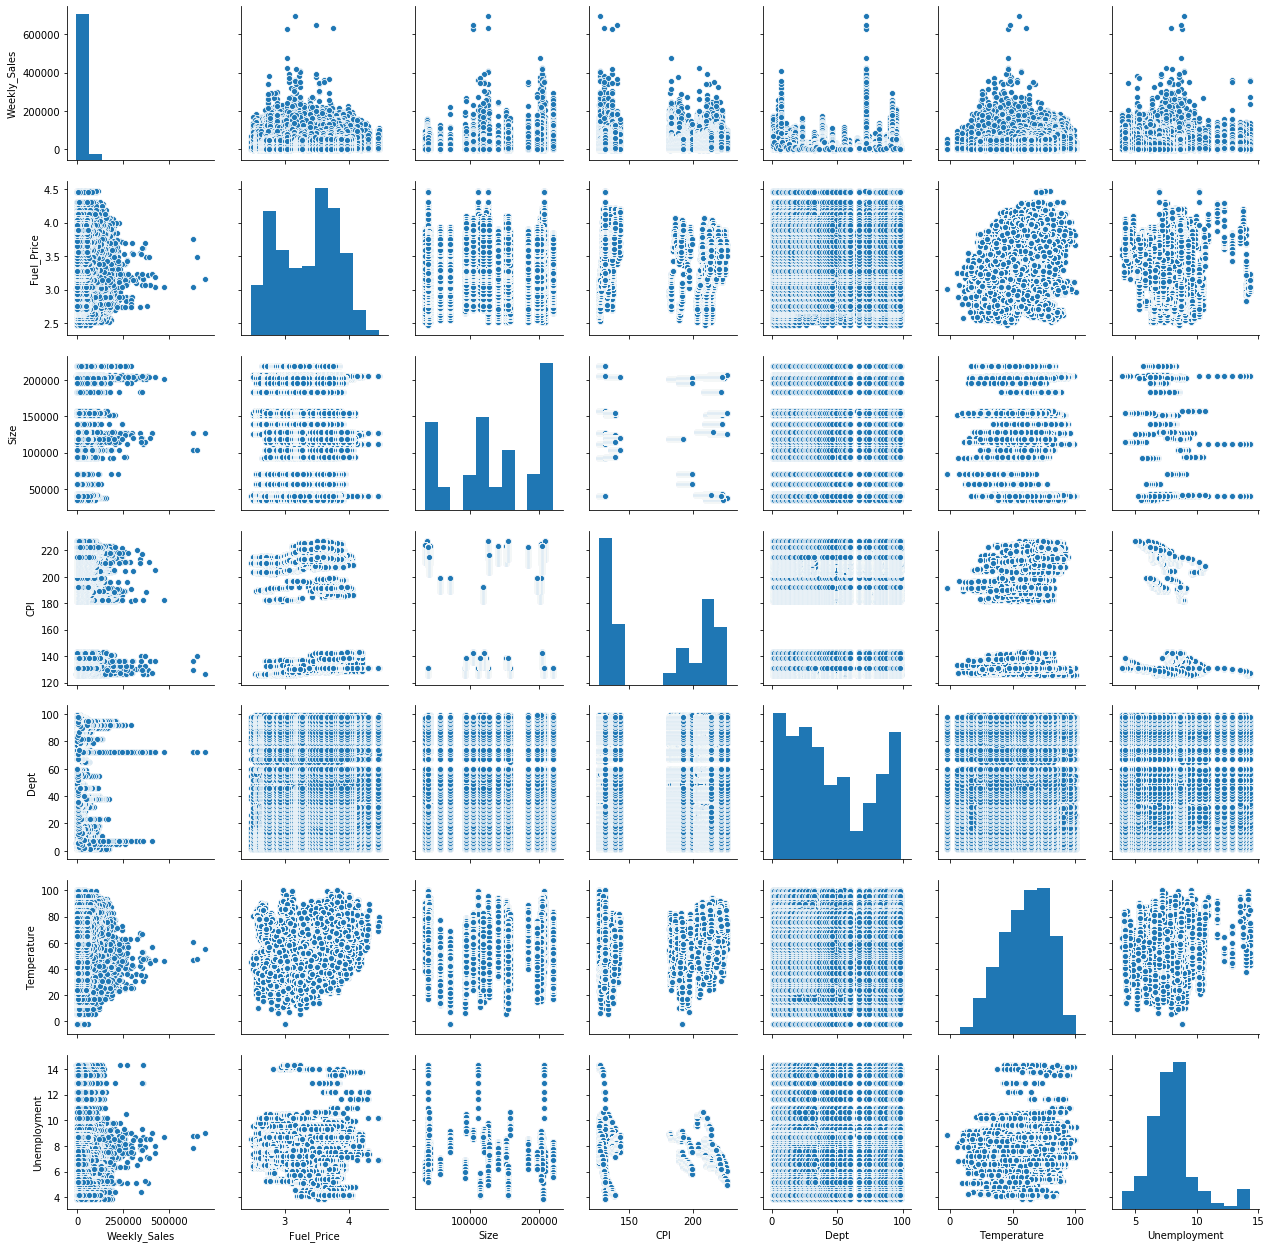

In [23]:
prl = sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])
#figure = prl.get_figure()
#figure.savefig('pairplot.png', dpi=400)

In [7]:
#sns.pairplot(test, vars=[ 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

### Поиск на пропущенные значения с последующей заменой их на 0

In [8]:
print (train.isnull().sum())
#print ("*"*30)
#print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [9]:
#test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
#test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [10]:
train=train.fillna(0)
#test=test.fillna(0)

In [11]:
print (train.isnull().sum())
#print ("*"*30)
#print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [12]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

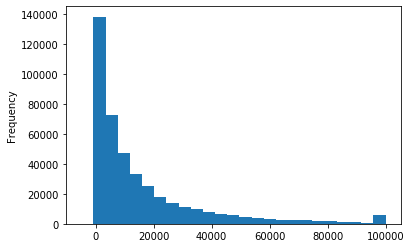

In [13]:
train.Weekly_Sales.plot.hist(bins=25)

### работа с признаком - date

In [14]:
#замена типа для Date
train['Date'] = pd.to_datetime(train['Date'])
#test['Date'] = pd.to_datetime(test['Date'])

In [15]:
# Извлечь особенности даты
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

#test['Date_dayofweek'] =test['Date'].dt.dayofweek
#test['Date_month'] =test['Date'].dt.month 
#test['Date_year'] =test['Date'].dt.year
#test['Date_day'] =test['Date'].dt.day

In [16]:
train.dtypes

Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                   bool
Type                      object
Size                       int64
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
Date_dayofweek             int64
Date_month                 int64
Date_year                  int64
Date_day                   int64
dtype: object

In [16]:
print (train.Type.value_counts())
#print ("*"*30)
#print (test.Type.value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [17]:
print (train.IsHoliday.value_counts())
#print ("*"*30)
#print (test.IsHoliday.value_counts())

False    391909
True      29661
Name: IsHoliday, dtype: int64


In [18]:
train_test_data = [train, test]

### Преобразование категориальной переменной 'Type' в числовую переменную Для A = 1, B = 2, C = 3

In [19]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

### Преобразование категориальной переменной IsHoliday в числовую переменную

In [21]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [34]:
#features_drop=['Unemployment','CPI','MarkDown5'] # удаляем MarkDown5 так как он слишком уценен
#train=train.drop(features_drop, axis=1)
#test=test.drop(features_drop, axis=1)
#test = test.drop(test.columns[[0, 1, 2, 3]], axis='columns')

### обучение

In [35]:
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 18), (421570,), (115064, 18))

In [36]:
#train.to_csv("train_done.csv")
#test.to_csv("test_done.csv")